第一步：读取原始数据

In [51]:
import pandas as pd
import numpy as np

In [52]:
inputfile="D:\\1_kaoyan\college_ending\\400仪表数据--全\middata - 副本\拉合闸最终.csv"

In [53]:
data_YuanLai=pd.read_csv(inputfile,encoding='utf-8')
data_YuanLai.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime
0,10014164400011,0,2017/4/11 20:56
1,10014164400011,1,2017/6/19 11:32
2,10014164400011,0,2017/6/19 11:45
3,10021160000828,0,2017/4/11 06:00
4,10021160000828,1,2017/5/1 17:00


In [54]:
data_YuanLai.tail(5)

,meterNo,relayStatus_0c1o,relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38
24637,10023160000352,0,2020/4/8 23:30
24638,10023160000352,1,2020/7/4 13:29
24639,10023160000352,0,2020/7/4 18:30
24640,10023160000352,1,2020/10/16 09:36


第二步：增加新的序列

In [55]:
data_time=data_YuanLai.copy(deep=1)

In [56]:
data_time['new_relayUpdateTime']=data_time['relayUpdateTime'].apply(pd.to_datetime)

In [57]:
data_time.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00


In [58]:
data_time.tail(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00


In [59]:
data_time['relayStatus_0c1o']=data_time['relayStatus_0c1o'].fillna(1).astype('int64')

In [60]:
data_time.tail(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00


In [61]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   meterNo              24641 non-null  int64         
 1   relayStatus_0c1o     24641 non-null  int64         
 2   relayUpdateTime      24641 non-null  object        
 3   new_relayUpdateTime  24641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 770.2+ KB


In [62]:
data_time['new_meterNo']=data_time['meterNo'].shift(-1).fillna('10023160000352').astype('int64')

In [63]:
data_time['new_0c1o']=data_time['relayStatus_0c1o'].shift(-1).fillna(1).astype('int64')

In [64]:
data_time['next_relayUpdateTime']=data_time['new_relayUpdateTime'].shift(-1).fillna('2017-05-01 17:00:00').apply(pd.to_datetime)

In [65]:
data_time.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00


In [66]:
data_time.tail(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00,10023160000352,1,2017-05-01 17:00:00


第三步：开始计算时间戳

In [67]:
data_time_JiSuan=data_time.copy(deep=1)

In [68]:
data_time_JiSuan.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00


In [69]:
data_time_JiSuan.tail(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00,10023160000352,1,2017-05-01 17:00:00


In [70]:
data_time_JiSuan

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00
...,...,...,...,...,...,...,...
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00


In [71]:
data_time_JiSuan['NoIf_time']=data_time_JiSuan['next_relayUpdateTime']-data_time_JiSuan['new_relayUpdateTime']

In [72]:
def timecompute(new_0c1o,relayStatus_0c1o,new_meterNo,meterNo,next_relayUpdateTime,new_relayUpdateTime):
    if meterNo==new_meterNo and new_0c1o==1 and relayStatus_0c1o==0:
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time

In [73]:
def time_JiSuan(data):
    new_0c1o=data['new_0c1o']
    relayStatus_0c1o=data['relayStatus_0c1o']
    new_meterNo=data['new_meterNo']
    meterNo=data['meterNo']
    next_relayUpdateTime=data['next_relayUpdateTime']
    new_relayUpdateTime=data['new_relayUpdateTime']
    if meterNo==new_meterNo and new_0c1o==0 and relayStatus_0c1o==1:
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time
    

In [74]:
data_time_JiSuan['If_Time']=data_time_JiSuan.apply(time_JiSuan,axis=1)

In [75]:
data_time_JiSuan.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime,NoIf_time,If_Time
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00,68 days 14:36:00,0
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00,0 days 00:13:00,0 days 00:13:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00,-70 days +18:15:00,0
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00,20 days 11:00:00,0
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00,0 days 00:30:00,0 days 00:30:00


In [76]:
data_time_JiSuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   meterNo               24641 non-null  int64          
 1   relayStatus_0c1o      24641 non-null  int64          
 2   relayUpdateTime       24641 non-null  object         
 3   new_relayUpdateTime   24641 non-null  datetime64[ns] 
 4   new_meterNo           24641 non-null  int64          
 5   new_0c1o              24641 non-null  int64          
 6   next_relayUpdateTime  24641 non-null  datetime64[ns] 
 7   NoIf_time             24641 non-null  timedelta64[ns]
 8   If_Time               24641 non-null  object         
dtypes: datetime64[ns](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 1.7+ MB


In [77]:
from datetime import  datetime

In [78]:
def shijianchuo(data):
    new_0c1o=data['new_0c1o']
    relayStatus_0c1o=data['relayStatus_0c1o']
    new_meterNo=data['new_meterNo']
    meterNo=data['meterNo']
    next_relayUpdateTime=data['next_relayUpdateTime']
    new_relayUpdateTime=data['new_relayUpdateTime']
    new_relayUpdateTime = int(datetime.timestamp(new_relayUpdateTime))
    next_relayUpdateTime = int(datetime.timestamp(next_relayUpdateTime))
    if meterNo==new_meterNo and new_0c1o==0 and relayStatus_0c1o==1  :
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time

In [79]:
data_time_JiSuan['If_Time_chuo']=data_time_JiSuan.apply(shijianchuo,axis=1)

In [80]:
data_time_JiSuan.head(5)

,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime,NoIf_time,If_Time,If_Time_chuo
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00,68 days 14:36:00,0,0
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00,0 days 00:13:00,0 days 00:13:00,780
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00,-70 days +18:15:00,0,0
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00,20 days 11:00:00,0,0
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00,0 days 00:30:00,0 days 00:30:00,1800


In [81]:
13*60

780

第四步：开始聚合

In [82]:
data_group=data_time_JiSuan.copy(deep=1)

In [83]:
datagroup_shijianchuo=data_group.groupby('new_meterNo',as_index=0).agg({'If_Time_chuo':'sum'})

In [84]:
datagroup_shijianchuo.head(5)

,new_meterNo,If_Time_chuo
0,10014164400011,780
1,10021160000828,672000
2,10021160000829,3324720
3,10021160000831,4373220
4,10021160000832,3217260


第五步：计算次数

In [85]:
data_cishu=data_time_JiSuan.copy(deep=1)

In [86]:
data_cishu=data_cishu[(data_cishu['relayStatus_0c1o']==1)].groupby(['meterNo'])['relayStatus_0c1o'].sum()

In [87]:
data_cishu.head(5)

meterNo
10014164400011     1
10021160000828     6
10021160000829    16
10021160000831    19
10021160000832    14
Name: relayStatus_0c1o, dtype: int64

In [88]:
type(data_cishu)

pandas.core.series.Series

第五步：2、把序列变成dataframe

In [89]:
data_lhz_cishu={'new_meterNo':data_cishu.index,'lhz_cishu':data_cishu.values}

In [90]:
data_lhz_cishu=pd.DataFrame(data_lhz_cishu)

第六步：把两个dataframe组合

In [91]:
data_lhz_cishu.head(5)

,new_meterNo,lhz_cishu
0,10014164400011,1
1,10021160000828,6
2,10021160000829,16
3,10021160000831,19
4,10021160000832,14


In [92]:
datagroup_shijianchuo.head(5)

,new_meterNo,If_Time_chuo
0,10014164400011,780
1,10021160000828,672000
2,10021160000829,3324720
3,10021160000831,4373220
4,10021160000832,3217260


In [93]:
data_fina=data_lhz_cishu.merge(datagroup_shijianchuo,how='inner',on='new_meterNo')

In [94]:
data_fina.head(5)

,new_meterNo,lhz_cishu,If_Time_chuo
0,10014164400011,1,780
1,10021160000828,6,672000
2,10021160000829,16,3324720
3,10021160000831,19,4373220
4,10021160000832,14,3217260


第七步：画图

In [95]:
import matplotlib.pyplot as plt

In [97]:
data_fina['mean_min']=(data_fina['If_Time_chuo']/data_fina['lhz_cishu'])/60

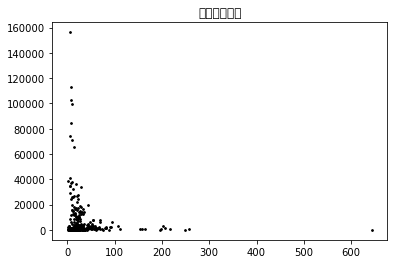

In [98]:
plt.title("次数和平均值")
plt.scatter(data_fina['lhz_cishu'], data_fina['mean_min'],color='k',s=3,label='Data points')


第八步：lof算法引进

In [101]:
lof_data=data_fina.copy(deep=1)

In [99]:
from sklearn.neighbors import LocalOutlierFactor

转换成为数组

In [103]:
X=np.array(lof_data)

In [104]:
type(X)

numpy.ndarray

In [109]:
Y=lof_data.values

In [110]:
Y

array([[1.00141644e+13, 1.00000000e+00, 7.80000000e+02, 1.30000000e+01],
       [1.00211600e+13, 6.00000000e+00, 6.72000000e+05, 1.86666667e+03],
       [1.00211600e+13, 1.60000000e+01, 3.32472000e+06, 3.46325000e+03],
       ...,
       [1.00231600e+13, 8.30000000e+01, 1.16475000e+07, 2.33885542e+03],
       [1.00231600e+13, 6.80000000e+01, 8.10294000e+06, 1.98601471e+03],
       [1.00231600e+13, 2.80000000e+01, 2.35858200e+07, 1.40391786e+04]])

In [111]:
Y.shape

(400, 4)

In [113]:
Y1=Y[:,1]

In [116]:
Y2=Y[:,3]

In [117]:
Y_pic=np.c_[Y1,Y2]

In [118]:
Y_pic.shape

(400, 2)

In [196]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

In [197]:
y_pred = clf.fit_predict(Y_pic)

In [198]:
X_scores = clf.negative_outlier_factor_

In [199]:
X_scores

array([-1.58017854, -1.08293793, -1.02059365, -1.07997715, -1.07759131,
       -1.0182373 , -1.06252158, -1.08992573, -1.2023487 , -0.99332442,
       -1.04994039, -1.05722142, -0.99044421, -1.04309134, -0.9757186 ,
       -1.43143216, -1.14812715, -1.00024445, -0.99989778, -1.03675638,
       -1.28715093, -1.06324661, -1.05384082, -1.0114045 , -0.9737631 ,
       -1.04042827, -0.98220706, -0.97453257, -1.04780256, -0.99053642,
       -0.98165291, -1.03598905, -0.99309537, -0.97269947, -0.99259804,
       -1.06883659, -1.08471696, -1.06903688, -1.46011684, -1.03735579,
       -0.97490947, -0.97450075, -0.98818133, -0.999898  , -0.9944814 ,
       -1.02293908, -1.00036006, -1.41694784, -1.02059365, -0.99821086,
       -0.98320552, -0.98397697, -0.99198478, -0.98930853, -0.99965373,
       -1.08649575, -1.07532978, -0.97323726, -1.04426311, -0.96700552,
       -1.05026945, -0.99761016, -0.9899436 , -0.97943825, -1.01617447,
       -1.00220313, -0.97425619, -1.01067685, -1.05120068, -1.06

In [177]:
Y_fina = np.c_[Y_pic,X_scores]

In [200]:
Y_all = np.c_[Y,X_scores]

In [127]:
Y_all.shape

(400, 5)

In [125]:
Y_fina.shape

(400, 3)

In [201]:
last_data=pd.DataFrame(Y_all)

In [202]:
last_data.head(5)

,0,1,2,3,4
0,1.001416e+13,1.0,780.0,13.000000,-1.580179
1,1.002116e+13,6.0,672000.0,1866.666667,-1.082938
2,1.002116e+13,16.0,3324720.0,3463.250000,-1.020594
3,1.002116e+13,19.0,4373220.0,3836.157895,-1.079977
4,1.002116e+13,14.0,3217260.0,3830.071429,-1.077591


In [ ]:
last_data.info()

第九步，处理最后数据

In [203]:
after_lof_data=last_data.copy(deep=1)

In [204]:
after_lof_data.columns=['meterNo','times','all_s','aver','score']

In [209]:
after_lof_data.head(5)

,meterNo,times,all_s,aver,score,z_score
0,10014164400011,1,780.0,13.000000,-1.580179,1.580179
1,10021160000828,6,672000.0,1866.666667,-1.082938,1.082938
2,10021160000829,16,3324720.0,3463.250000,-1.020594,1.020594
3,10021160000831,19,4373220.0,3836.157895,-1.079977,1.079977
4,10021160000832,14,3217260.0,3830.071429,-1.077591,1.077591


In [206]:
after_lof_data['meterNo']=after_lof_data['meterNo'].astype('int64').astype('object')

In [207]:
after_lof_data['times']=after_lof_data['times'].astype('int64')

In [208]:
after_lof_data['z_score']=after_lof_data['score'].abs()

排列

In [210]:
sort_after_lof_data=after_lof_data.copy(deep=1)

In [211]:
sort_after_lof_data.sort_values("z_score",inplace=True)

In [212]:
sort_after_lof_data.head(5)

,meterNo,times,all_s,aver,score,z_score
112,10021160000972,26,552660.0,354.269231,-0.957812,0.957812
116,10021160000976,21,444660.0,352.904762,-0.960020,0.960020
370,10023160000299,19,405300.0,355.526316,-0.961266,0.961266
291,10023160000153,19,1883520.0,1652.210526,-0.961733,0.961733
259,10023160000114,67,6519660.0,1621.805970,-0.962352,0.962352


In [213]:
sort_after_lof_data.iloc[379,5]

1.6854296147815186

In [214]:
sort_after_lof_data.loc[sort_after_lof_data['z_score']>=sort_after_lof_data.iloc[379,5],'class']=0
sort_after_lof_data.loc[sort_after_lof_data['z_score']<sort_after_lof_data.iloc[379,5],'class']=1

In [215]:
sort_after_lof_data['times'][:379]

112    26
116    21
370    19
291    19
259    67
       ..
286     8
195    30
308    11
74     21
237    45
Name: times, Length: 379, dtype: int64

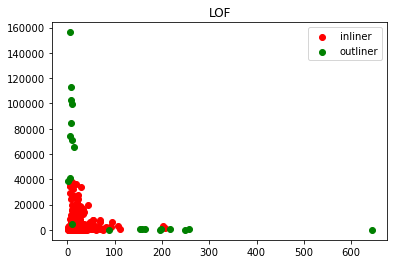

In [216]:
plt.title("LOF")
plt.scatter(sort_after_lof_data['times'][:379],sort_after_lof_data['aver'][:379],color='r',label="inliner")
plt.scatter(sort_after_lof_data['times'][379:],sort_after_lof_data['aver'][379:],color='g',label="outliner")
plt.legend()
plt.show()

In [195]:
sort_after_lof_data.tail(20)

,meterNo,times,all_s,aver,score,z_score,class
203,10023160000013,34,8593560.0,4212.529412,-2.107654,2.107654,0.0
114,10021160000974,111,5270220.0,791.324324,-2.406608,2.406608,0.0
392,10023160000342,89,1682940.0,315.157303,-2.423722,2.423722,0.0
331,10023160000234,11,46908000.0,71072.727273,-2.742338,2.742338,0.0
272,10023160000132,14,54878100.0,65331.071429,-2.760109,2.760109,0.0
246,10023160000097,7,35441640.0,84384.857143,-2.816650,2.816650,0.0
179,10021160001063,6,26722920.0,74230.333333,-2.830378,2.830378,0.0
362,10023160000284,11,65861640.0,99790.363636,-2.836017,2.836017,0.0
212,10023160000029,8,49484820.0,103093.375000,-2.884867,2.884867,0.0
307,10023160000177,7,47463060.0,113007.285714,-3.068193,3.068193,0.0
